In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read 'SP500_data' csv file.


In [7]:
sp500 = pd.read_csv('../Data/SP500_data.csv')
sp500

,year,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return
0,1950,0.0744,7.47,11.90,0.0257,21.21,NaN
1,1951,0.0602,9.95,12.53,0.0268,24.19,0.140500
2,1952,0.0541,10.86,13.01,0.0283,26.18,0.082265
3,1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502
4,1954,0.0440,12.58,15.99,0.0261,35.60,0.398272
...,...,...,...,...,...,...,...
65,2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029
66,2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823
67,2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221
68,2018,0.0209,19.60,28.38,0.0271,2607.39,-0.065385


In pandas, all the mathematical operators will apply the same operation to each element in the Series. It would usually require a ‘for’ loop to iterate each of the items in the sequence. But pandas is built on top of the NumPy library that can operate on entire sequences of data without the writing for loops.

In [8]:
sp500['indicator'] = sp500.dividendYield > 0.03
sp500['indicator'] = sp500['indicator'].shift()
sp500['port_return'] = 0.6 * sp500['annual_return'] + 0.4 * sp500['10yearTyield']
sp500

,year,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return,indicator,port_return
0,1950,0.0744,7.47,11.90,0.0257,21.21,NaN,NaN,NaN
1,1951,0.0602,9.95,12.53,0.0268,24.19,0.140500,True,0.095020
2,1952,0.0541,10.86,13.01,0.0283,26.18,0.082265,True,0.060679
3,1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502,True,-0.006581
4,1954,0.0440,12.58,15.99,0.0261,35.60,0.398272,True,0.249403
...,...,...,...,...,...,...,...,...,...
65,2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029,False,-0.024057
66,2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823,False,0.121214
67,2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221,False,0.146053
68,2018,0.0209,19.60,28.38,0.0271,2607.39,-0.065385,False,-0.028391


The ‘where()’ method from numpy will process elements depending on the condition provided. In the below code, we gave the boolean column ‘indicator’ as the condition. If it is true, it will return the result of the second argument, and if not, it will return the result of the third argument.

In [9]:
sp500['strat_return'] =  np.where(sp500['indicator'], 
                              0.8 * sp500['annual_return'] + 0.2 * sp500['10yearTyield'], 
                              0.6 * sp500['annual_return'] + 0.4 * sp500['10yearTyield'])
sp500

,year,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return,indicator,port_return,strat_return
0,1950,0.0744,7.47,11.90,0.0257,21.21,NaN,NaN,NaN,NaN
1,1951,0.0602,9.95,12.53,0.0268,24.19,0.140500,True,0.095020,0.117760
2,1952,0.0541,10.86,13.01,0.0283,26.18,0.082265,True,0.060679,0.071472
3,1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502,True,-0.006581,-0.017042
4,1954,0.0440,12.58,15.99,0.0261,35.60,0.398272,True,0.249403,0.323837
...,...,...,...,...,...,...,...,...,...,...
65,2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029,False,-0.024057,-0.024057
66,2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823,False,0.121214,0.121214
67,2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221,False,0.146053,0.146053
68,2018,0.0209,19.60,28.38,0.0271,2607.39,-0.065385,False,-0.028391,-0.028391


In [10]:
sp500[['port_return','strat_return']].describe()

,port_return,strat_return
count,69.000000,69.000000
mean,0.074909,0.079782
std,0.093835,0.109669
min,-0.213242,-0.213242
25%,0.006805,-0.004167
50%,0.086759,0.087278
75%,0.147563,0.150035
max,0.249403,0.323837


The `cumprod()` method will return cumulative product over a DataFrame. 

In [12]:
sp500['port_cr'] = (sp500['port_return'] + 1).cumprod() - 1
sp500['strat_cr'] = (sp500['strat_return'] + 1).cumprod() - 1
sp500

,year,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return,indicator,port_return,strat_return,port_cr,strat_cr
0,1950,0.0744,7.47,11.90,0.0257,21.21,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,0.0602,9.95,12.53,0.0268,24.19,0.140500,True,0.095020,0.117760,0.095020,0.117760
2,1952,0.0541,10.86,13.01,0.0283,26.18,0.082265,True,0.060679,0.071472,0.161465,0.197649
3,1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502,True,-0.006581,-0.017042,0.153821,0.177239
4,1954,0.0440,12.58,15.99,0.0261,35.60,0.398272,True,0.249403,0.323837,0.441588,0.558473
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029,False,-0.024057,-0.024057,76.122416,95.081460
66,2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823,False,0.121214,0.121214,85.470717,106.727858
67,2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221,False,0.146053,0.146053,98.099992,122.461794
68,2018,0.0209,19.60,28.38,0.0271,2607.39,-0.065385,False,-0.028391,-0.028391,95.286467,118.956619


We set the `year` as the index so pandas can automatically recognize it and use it as an x axis.

Text(0, 0.5, 'cumulative return')

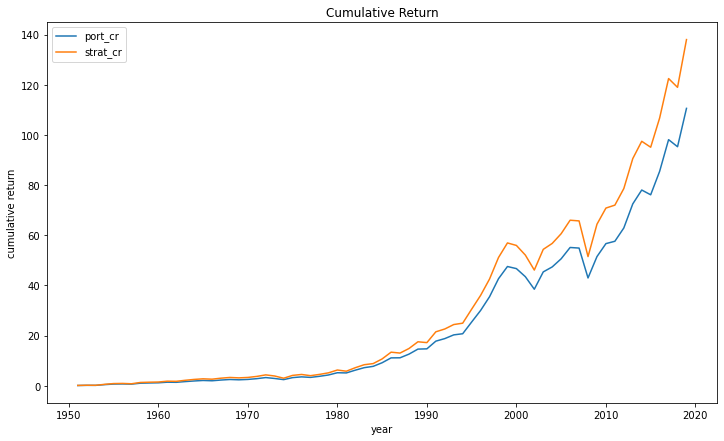

In [13]:
plot_data = sp500[['year','port_cr','strat_cr']].set_index('year')
ax = plot_data.plot(figsize = (12, 7))
ax.set_title('Cumulative Return')
ax.set_ylabel('cumulative return')